## We will cover the following topics:
*  Representing an image

*  Why leverage neural networks for image analysis?

*  Preparing data for image classification

*  Training a neural network

*  Scaling a dataset to improve model accuracy

*  Understanding the impact of varying the batch size

*  Understanding the impact of varying the loss optimizer

*  Understanding the impact of varying the learning rate

*  Understanding the impact of learning rate annealing

*  Building a deeper neural network

*  Understanding the impact of batch normalization

*  The concept of overfitting

---

# Representing an image

 * A digital image file is made up an array of pixels, with grayscale images having single values between 0 and 255 (0 is black, 255 is white), while color images have three-dimensional vectors representing red, green, and blue channels.

 * An image has height x width x c pixels, where height is the number of rows, width is the number of columns, and c is 3 for color images and 1 for grayscale.
 
 * A pixel value of 0 is black, and 255 is pure white for grayscale or pure red/green/blue in the respective channel for a color image.

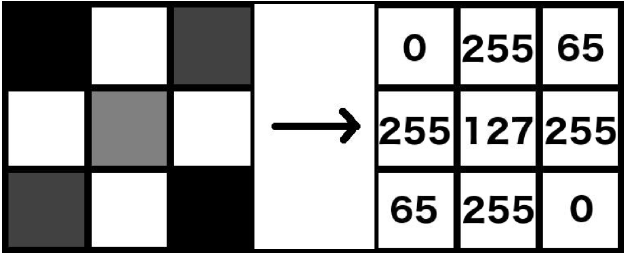

---

# Converting images into structured arrays and scalars

In [1]:
# 1. Download a sample image
! wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg

--2023-10-30 18:23:57--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 

162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2023-10-30 18:23:59--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3eba0826aeb2b9c7da1124704a.dl.dropboxusercontent.com/cd/0/inline/CGn13qPgdZt_9m4w-nCOETjaR3hrXZHxusWV9YWZkt7XKzFp-IJkp84MmVRfL7INfQoH6Z7eX8zTALlnmG1zRFPsieOWo6xmPtIwiQCT2UoRWSBmSWDMF6weaMN7T0vMuijJV5yHLyjXFvOVMX6GZwj9/file# [following]
--2023-10-30 18:24:03--  https://uc3eba0826aeb2b9c7da1124704a.dl.dropboxusercontent.com/cd/0/inline/CGn13qPgdZt_9m4w-nCOETjaR3hrXZHxusWV9YWZkt7XKzFp-IJkp84MmVRfL7INfQoH6Z7eX8zTALlnmG1zRFPsieOWo6xmPtIwiQCT2UoRWSBmSWDMF6weaMN7T0vMuijJV5yHLyjXFvOVMX6GZwj9/file
Resolving uc3eba0826aeb2b9c7da1124704a.dl.dropboxusercontent.com (uc

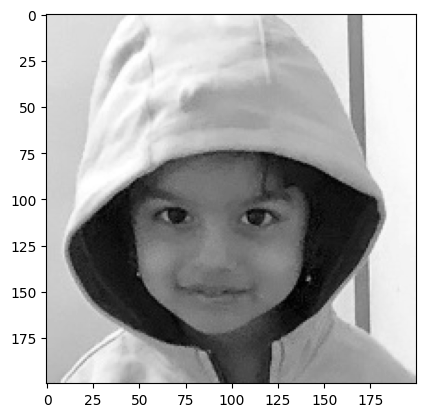

In [2]:
# 2. Import libraries and read the downloaded image into the Python environment
import cv2
import matplotlib.pyplot as plt

img =cv2.imread('Hemanvi.jpeg')  # This converts an image into an array of pixel

# 3. We'll crop the image between 50th-250th rows, as well as 40th-240th  and convert the image into grayscale
img = img[50:250, 40:240]
img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

# # Show image
plt.imshow(img_gray,  cmap='gray')
plt.show()

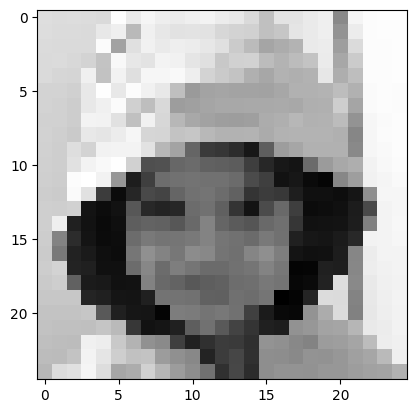

In [3]:
# 4. Convert the image into a 25 x 25 array and plot it
img_gray_small = cv2.resize(img_gray , (25,25))
plt.imshow(img_gray_small, cmap='gray')
plt.show()

* Having fewer pixels to represent the same image results in a blurrier output.

In [4]:
# 5. Let's inspect the pixel values
img_gray_small

array([[222, 220, 221, 220, 218, 253, 234, 245, 238, 235, 239, 243, 236,
        232, 218, 193, 228, 228, 234, 239, 139, 245, 252, 253, 253],
       [221, 219, 219, 218, 232, 239, 186, 240, 231, 226, 227, 226, 215,
        212, 209, 193, 199, 229, 234, 239, 150, 236, 252, 253, 253],
       [219, 218, 218, 218, 251, 163, 224, 241, 234, 238, 236, 231, 224,
        204, 188, 166, 173, 180, 234, 236, 159, 219, 252, 252, 253],
       [218, 219, 216, 211, 196, 248, 231, 228, 243, 241, 229, 224, 201,
        209, 210, 189, 181, 189, 196, 235, 168, 204, 252, 252, 253],
       [218, 214, 213, 240, 195, 242, 223, 246, 246, 249, 238, 211, 203,
        196, 177, 168, 179, 176, 179, 231, 175, 191, 252, 252, 253],
       [212, 212, 208, 232, 254, 232, 252, 241, 232, 192, 155, 164, 166,
        165, 164, 163, 168, 178, 178, 181, 190, 178, 250, 252, 251],
       [211, 209, 205, 232, 240, 251, 208, 191, 217, 158, 161, 166, 169,
        169, 170, 170, 171, 169, 176, 177, 206, 166, 250, 252, 251],
      

**Note** that in the preceding code, we have reordered the channels using the cv2.cvtcolor method. We've done this because when we import images using cv2, the channels are ordered as Blue first, Green next,and finally Red; typically, we are used to looking at images in RGB channels, where the sequence is Red, Green, and then Blue.

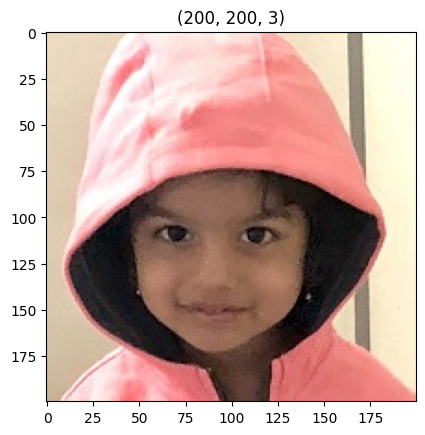

In [5]:
# working on colored img
img =cv2.imread('Hemanvi.jpeg') 
img = img[50:250,40:240,:]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Plot the image
plt.imshow(img)
plt.title(f'{img.shape}')
plt.show()

[[[242 149 141]
  [249 161 151]
  [239 161 148]]

 [[239 145 135]
  [244 150 140]
  [247 159 149]]

 [[239 145 135]
  [242 148 138]
  [245 153 142]]]


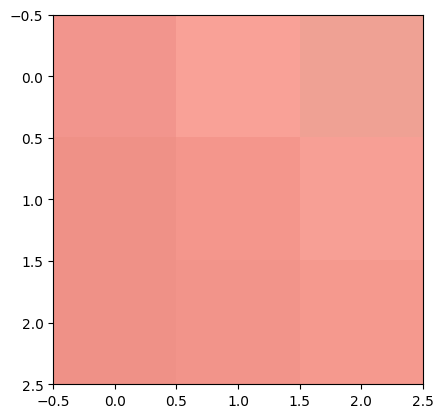

In [6]:
# The bottom-right 3 x 3 array of pixels
crop_img = img[-3:,-3:]

# print and plot crop_img
print(crop_img)
plt.imshow(crop_img)
plt.show()

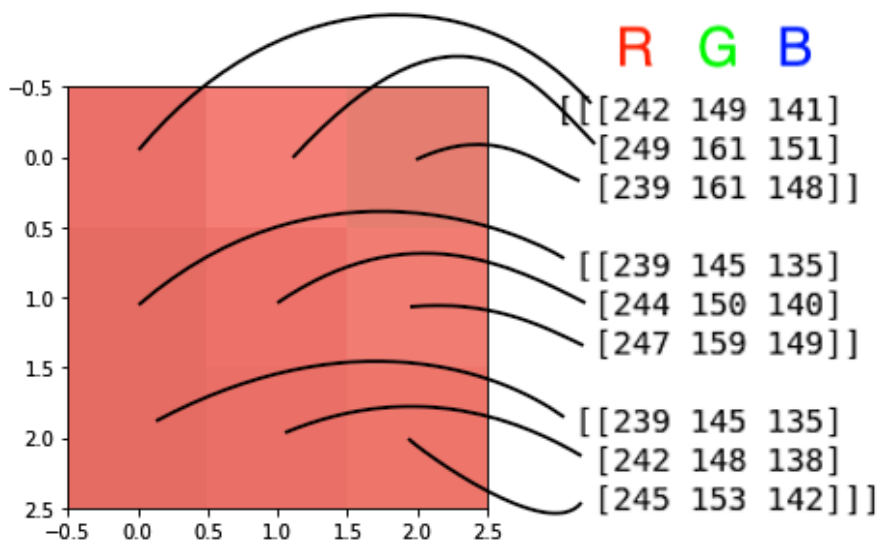

    Converting an image into a structured array of numbers allows us to perform mathematical operations on images, enabling tasks like classification, detection, and segmentation through various techniques, leveraging the numerical representation of images.


---



# Why leverage neural networks for image analysis?

#####  Traditional computer vision methods required the manual creation of specific image features before processing, a step avoided by training neural networks, which can learn and extract features automatically.

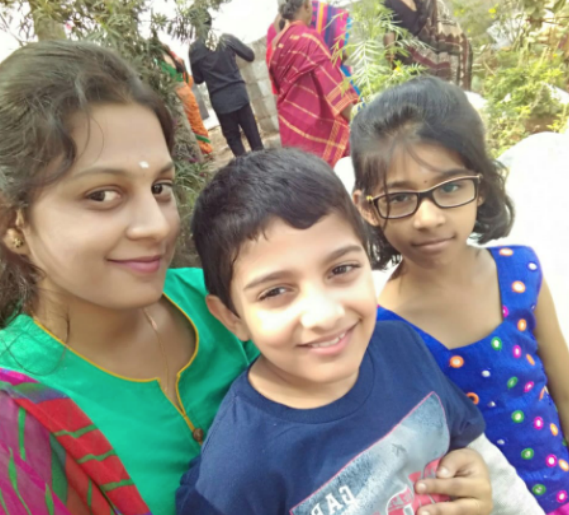

* **Histogram feature**: For some tasks, such as auto-brightness or night vision, it is important to understand the illumination in the picture; that is, the fraction of pixels that are bright or dark

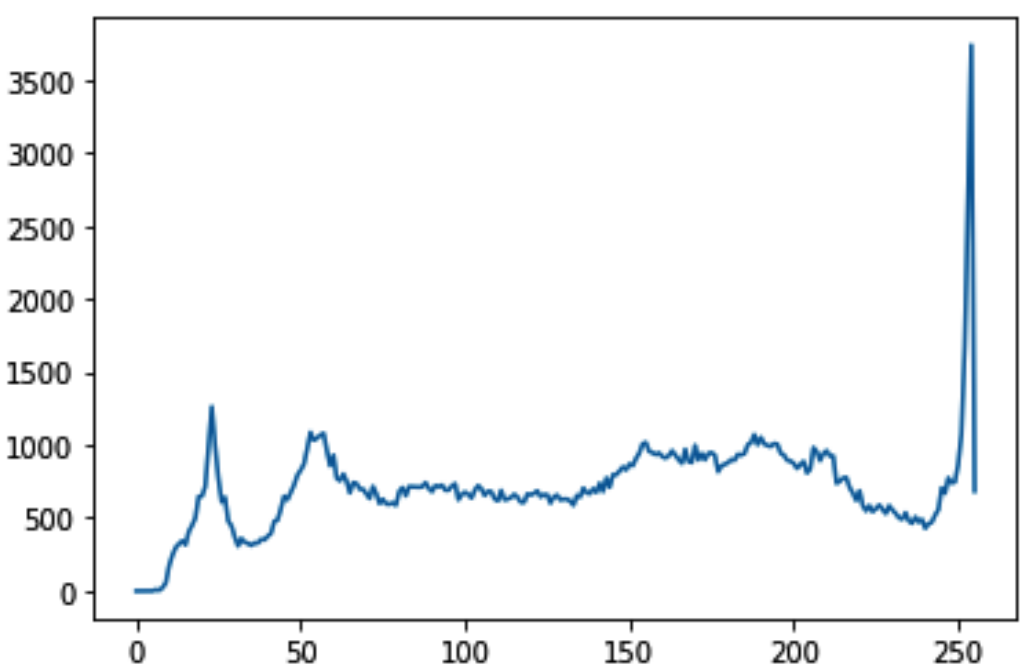


The following graph shows a histogram for the example image. It depicts that the image is well illuminated since there is a spike at 255

---

* **Edges and Corners feature**: For tasks such as image segmentation, where it is important to find the set of pixels corresponding to each person, it makes sense to extract the edges first because the border of a person is just a collection of edges. In other tasks, such as image registration, it is vital that key landmarks are detected. These landmarks will be a subset of all the corners in an image.

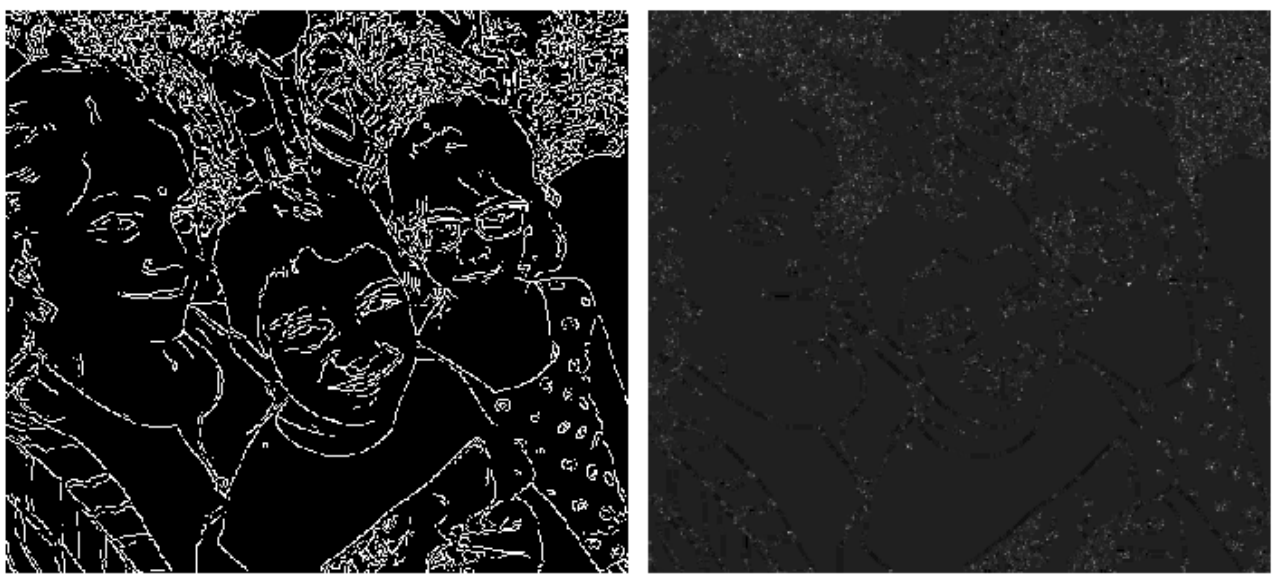

The following image represents the edges and corners that can be found in our example image

---

* **Color separation feature**: In tasks such as traffic light detection for a self-driving car, it is important that the system understands what color is being displayed on the traffic lights. 

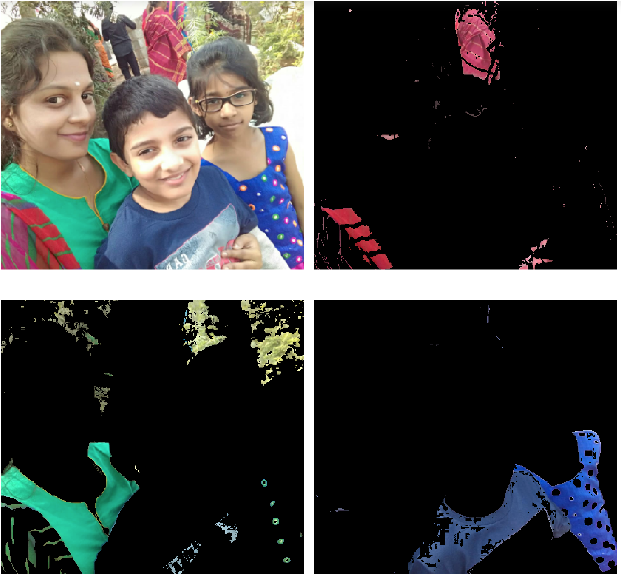

The following image (best viewed in color) shows the exclusively red, green, and blue pixels for the example image

---

* **Image gradients feature**: Taking this a step further, it might be important to understand how the colors are changing at the pixel level. Different textures can give us different gradients, which means they can be used as texture detectors. In fact, finding gradients is a prerequisite for edge detection.

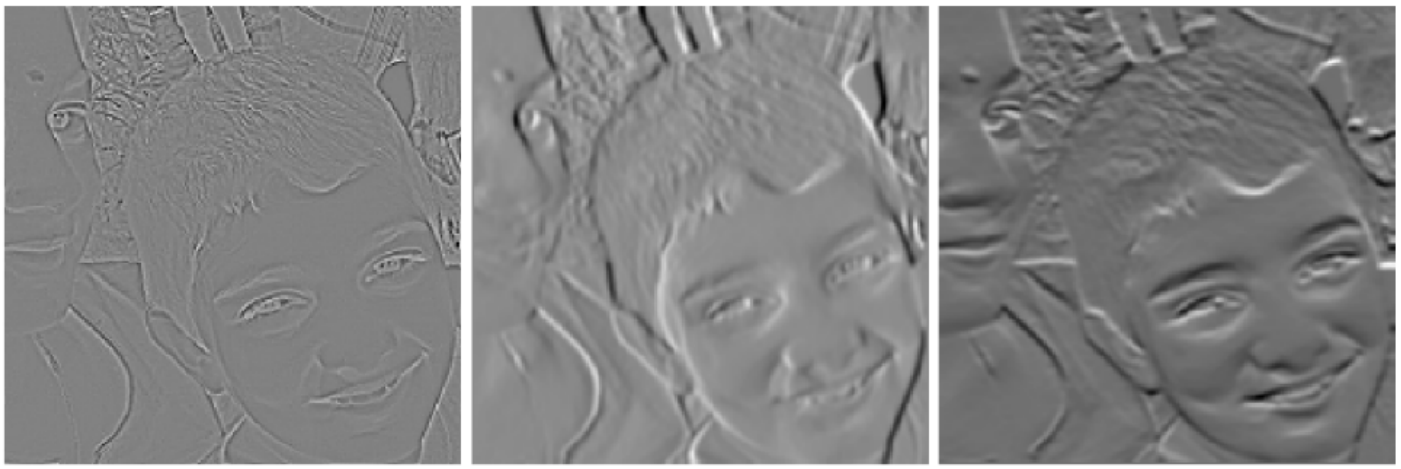

The following image shows the overall gradient, as well as the y and x components of the gradient, for a section of our example image

 ---

- Traditional feature creation for image and signal analysis requires expertise and a deep understanding of which features are suitable for solving a problem.

- Even with expertise, there's no assurance that an expert can find the ideal combination of inputs or that this combination will work in new scenarios.

- The limitations in traditional feature engineering have led the community to favor neural network-based models.

- Neural networks autonomously identify relevant features and learn to combine them optimally for tasks, serving as both feature extractors and classifiers.

---

# Preparing our data for image classification

In [1]:
# 1. Start by downloading the dataset and importing the relevant packages.
from torchvision import datasets
import torch

data_folder ='Dataset/FMNIST/'
fmnist = datasets.FashionMNIST(root=data_folder, download=True, train=True)

100%|██████████| 26421880/26421880 [00:48<00:00, 540786.62it/s] 


Extracting Dataset/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to Dataset/FMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 292650.99it/s]


Extracting Dataset/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Dataset/FMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:13<00:00, 328697.88it/s]


Extracting Dataset/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Dataset/FMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 800069.55it/s]

Extracting Dataset/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Dataset/FMNIST/FashionMNIST/raw



In [2]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [6]:
# 2. Inspect the tensors that we are dealing with
unique_values = tr_targets.unique()
print(f'tr_images & tr_targets:\n\tX -{tr_images.shape}\n\tY -{tr_targets.shape}\n\tY-Unique Values : {unique_values}')
print(f'TASK:\n\t{len(unique_values)} class Classification')
print(f'UNIQUE CLASSES:\n\t{fmnist.classes}')

tr_images & tr_targets:
	X -torch.Size([60000, 28, 28])
	Y -torch.Size([60000])
	Y-Unique Values : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 class Classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


---
The dataset comprises 60,000 images, each sized 28 x 28, distributed across 10 distinct classes, where tr_targets holds the numerical class values, and fmnist.classes provides the corresponding class names for these numeric values.

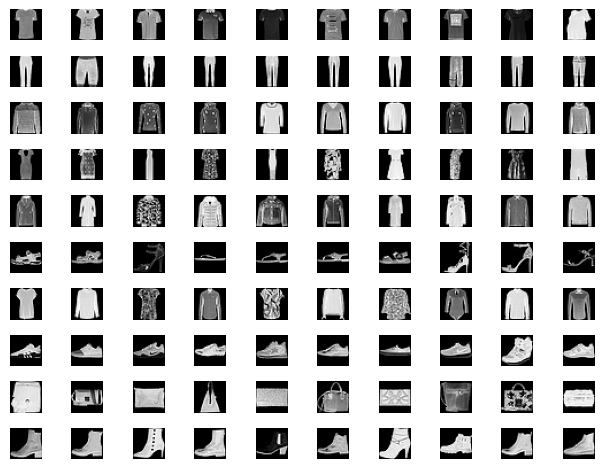

In [12]:
import numpy as np 
import matplotlib.pyplot as plt

# 3. Plot a random sample of 10 images for all the 10 possible classes
def plot_random_samples(tr_images, tr_targets):
    """Plots a random sample of 10 images for all the 10 possible classes.

    Args:
        tr_images (np.ndarray): A numpy array of the training images.
        tr_targets (np.ndarray): A numpy array of the training targets.

    Returns:
        None
    """

    fig, ax = plt.subplots(10, 10)

    for label_class, plot_row in enumerate(ax):
        # Get the indices of all the images in the training set that belong to the current class.
        label_x_rows = np.where(tr_targets == label_class)[0]

        # Iterate over the subplots in the current row.
        for plot_cell in plot_row:
            # Disable the grid and the axes for each subplot.
            plot_cell.grid(False)
            plot_cell.axis('off')

            # Randomly select one image from the training set for the current class.
            ix = np.random.choice(label_x_rows)

            # Get the image and the target value of the selected image.
            x, y = tr_images[ix], tr_targets[ix]

            # Display the image in the current subplot.
            plot_cell.imshow(x, cmap='gray')

    # Tighten the layout of the figure.
    plt.tight_layout()

    # Display the figure.
    plt.show()


# Plot the random samples.
plot_random_samples(tr_images, tr_targets)


    Note that in the preceding image, each row represents a sample of 10 different images all belonging to the same class.

---

# Training a neural network

##### To train a neural network, we must perform the following steps:

1. Import the relevant packages.

2. Build a dataset that can fetch data one data point at a time.

3. Wrap the DataLoader from the dataset.

4. Build a model and then define the loss function and the optimizer.

5. Define two functions to train and validate a batch of data, respectively.

6. Define a function that will calculate the accuracy of the data.

7. Perform weight updates based on each batch of data over increasing epochs.

In [3]:
# 1. Import the relevant packages and the FMNIST dataset
import torch 
import torch.nn as nn
from torch.optim import SGD
from torchvision import datasets 
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

## define device 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## folder path to download data
data_folder ='Dataset/FMNIST/'

## download FMNIST
fmnist = datasets.FashionMNIST(root= data_folder ,download=True ,train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

In [4]:
# 2. Build a class that fetches the dataset.
class FMNISTDataset(Dataset):
    def __init__(self , x, y):
        self.x =x.float().view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y =self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)

# 3. Create a function that generates a training DataLoader
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train,batch_size=32, shuffle=True)
    return trn_dl

#4. Define a model, as well as the loss function and the optimizer
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2) 
    return model, loss_fn, optimizer

# 5. Define a function that will train the dataset on a batch of images
def train_batch(x,y,model,opt,loss_fn):
    model.train()
    prediction = model(x)
    #compute loss
    batch_loss = loss_fn(prediction,y)

    # based on the forward pass in `model(x)` compute all the
    # gradients of 'model.parameters()'
    batch_loss.backward()

    # apply new-weights = f(old-weights, old-weight-gradients)
    # where "f" is the optimizer
    opt.step()
    # Flush gradients memory for next batch of calculations
    opt.zero_grad()
    return batch_loss.item()

# 6. Build a function that calculates the accuracy of a given dataset
# since there's no need for updating weights,
# we might as well not compute the gradients.
# Using this '@' decorator on top of functions
# will disable gradient computation in the entire function

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    # get the prediction matrix for a tensor of `x` images
    prediction = model(x)
    # compute if the location of maximum in each row
    # coincides with ground truth
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()


In [5]:
# 7. Train the neural network

## Initialize the model, loss, optimizer, and DataLoaders
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

## Invoke the lists that contain the accuracy and loss values at the end of each epoch
losses , accuracies = [],[]
for epoch in range(5):
    print(epoch)

    # Invoke the lists that will contain the accuracy and loss values corresponding to each batch within an epoch
    epoch_losses , epoch_accuracies = [],[]

    # Create batches of training data by iterating through the DataLoader
    for ix , batch in enumerate(iter(trn_dl)):
        x,y  = batch 
        
        #  store the loss values across batches in the epoch_losses list
        batch_loss = train_batch(x,y,model,optimizer,loss_fn)
        
        epoch_losses.append(batch_loss)
    # We store the mean loss value across all batches within an epoch
    epoch_loss = np.array(epoch_losses).mean()
    
    # Next, we calculate the accuracy of the prediction at the end of training on all batches    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


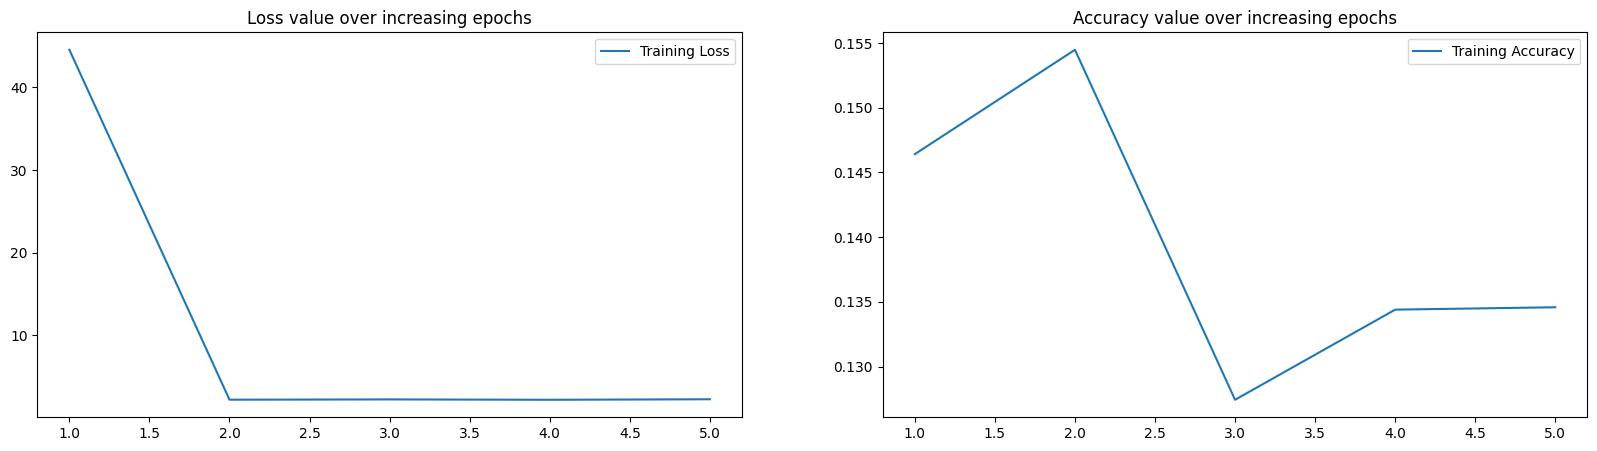

In [6]:
# The variation of the training loss and accuracy over increasing epochs can be displayed
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.legend()
plt.show()

Our training accuracy is at 12% at the end of the five epochs. Note that the loss value did not decrease considerably over an increasing number of epochs. In other words, no matter how long we wait, it is unlikely that the model is going to provide high accuracy (say, above 80%). This calls for us to understand how the various hyperparameters that were used impact the accuracy of our neural network.

---

# Scaling a dataset to improve model accuracy

    Scaling a dataset is the process of ensuring that the variables are confined to a finite range.

we will confine the independent variables' values to values between 0 and 1 by dividing each input value by the maximum possible value in the dataset. This is a value of 255, which corresponds to white pixels

In [7]:
# 1. Fetch the dataset, as well as the training images and targets
import torch 
import torch.nn as nn
from torch.optim import SGD
from torchvision import datasets 
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

## define device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## folder path to download data
data_folder ='Dataset/FMNIST/'

## download FMNIST
fmnist = datasets.FashionMNIST(root=data_folder, download=True,train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

In [10]:
# 2. Modify FMNISTDataset, which fetches data, so that the input image is divided by 255 
class FMNISTDataset(Dataset):
    def __init__(self, x,y):
        self.x = (x.float()/255).view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y = self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)
    
# 3. Train a model
## Fetch the data
def get_data():
    train = FMNISTDataset(tr_images,tr_targets)
    trn_dl = DataLoader(train , batch_size=32 , shuffle=True)
    return trn_dl

## Define the model
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    optimizer = SGD(model.parameters(),lr=1e-2)
    loss_fn = nn.CrossEntropyLoss()
    return model,loss_fn,optimizer

## Define the functions for training and validating a batch of data
def train_batch(x, y, model ,opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

## Train the model over increasing epochs
trn_dl = get_data()
model, loss_fn, optimizer = get_model()
losses, accuracies = [], []

for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer,loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


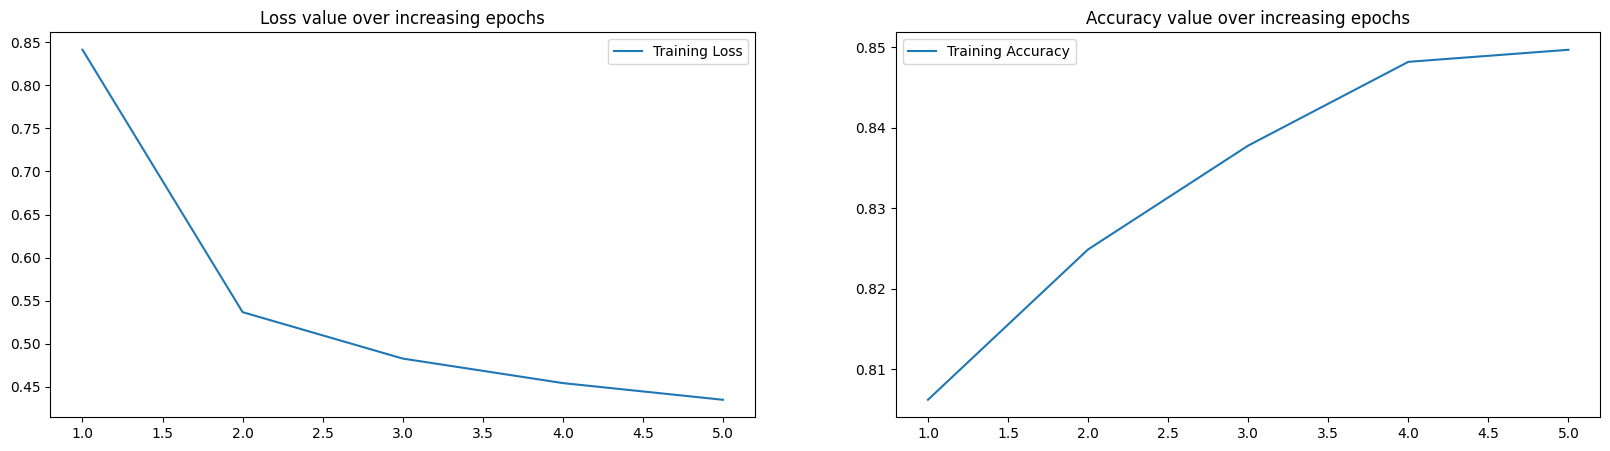

In [11]:
# The variation of the training loss and accuracy over increasing epochs can be displayed
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.legend()
plt.show()

As we can see, the training loss consistently reduced and the training accuracyconsistently increased, thus increasing the epochs to an accuracy of ~85%.
Contrast the preceding output with the scenario where input data is not scaled, wheretraining loss did not reduce consistently, and the accuracy of the training dataset atthe end of five epochs was only 12%.

* In the following table, we've calculated the Sigmoid column based on the sigmoid formula

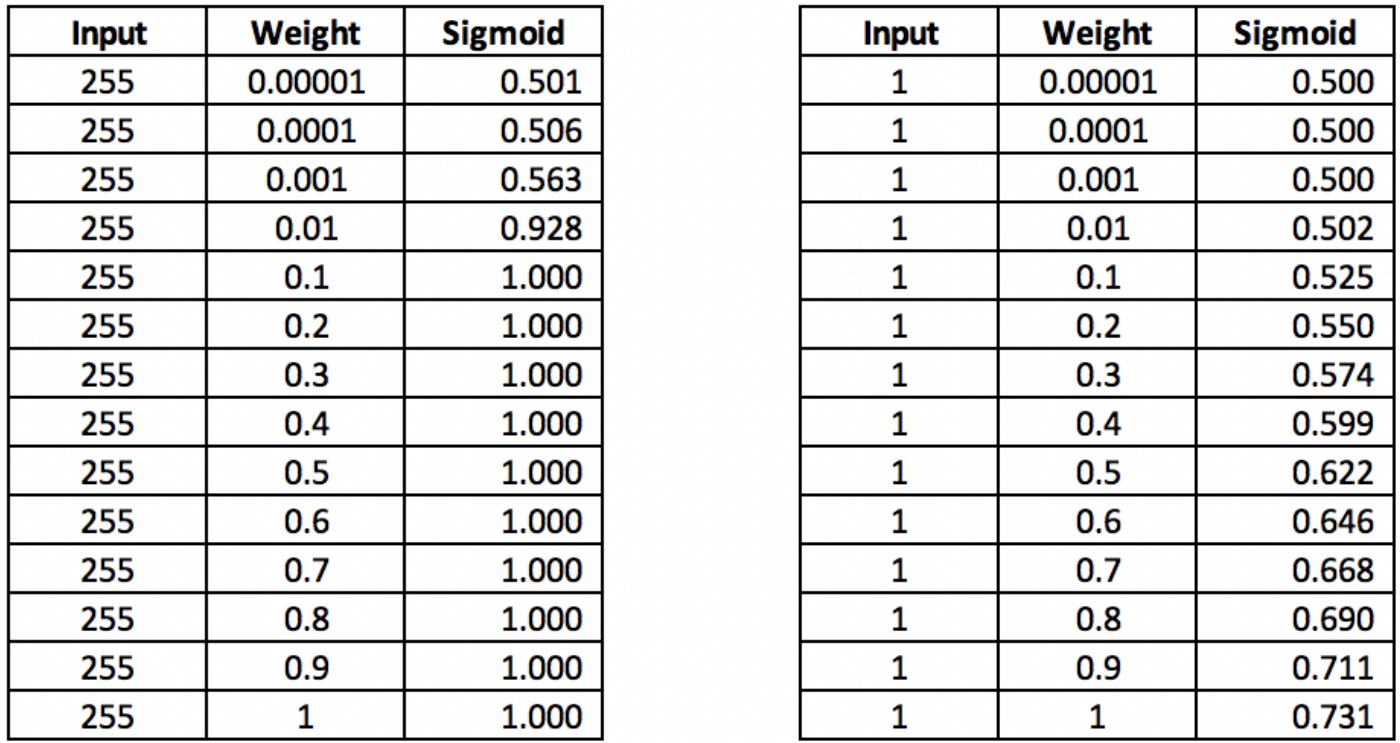

In the left-hand table, we can see that when the weight values are more than 0.1, the Sigmoid value does not vary with an increasing (changing) weight value. Furthermore, the Sigmoid value changed only by a little when the weight was extremely small; the only way to vary the sigmoid value is by having the weight change to a very, very small amount.

However, the Sigmoid value changed considerably in the right-hand table when the input value was small.

    The reason for this is that the exponential of a larg negative value (resulting from multiplying the weight value by a large number) is very close to 0, while the exponential value varies when the weight is multiplied by a scaled input, as seen in the right-hand table.

---

# Understanding the impact of varying the batch size

### 1. Batch size of 32

In [1]:
# 1. Download and import the training images and targets
from torchvision import datasets
import torch


## folder path to download data
data_folder ='Dataset/FMNIST/'

## download FMNIST
fmnist = datasets.FashionMNIST(root=data_folder, download=True,train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

# 2. In a similar manner to training images, we must download and import the validation dataset by specifying train = False 
val_fmnist =datasets.FashionMNIST(data_folder,download=True,train=False)

val_images = val_fmnist.data
val_targets = val_fmnist.targets

# 3. Import the relevant packages and define device
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 4. Define the dataset class (FashionMNIST), the functions that will be used totrain on a batch of data (train_batch), calculate the accuracy (accuracy),and then define the model architecture, the loss function, and the optimizer(get_model).
class FMNISTDataset(Dataset):
    def __init__(self, x,y):
        self.x = (x.float()/255).view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y = self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)
    
## Define the model
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    optimizer = Adam(model.parameters(),lr=1e-2)
    loss_fn = nn.CrossEntropyLoss()
    return model,loss_fn,optimizer
## Define the functions for training and validating a batch of data
def train_batch(x, y, model ,opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()


# 5. Define a function that will get data; that is, get_data. This function will return the training data with a batch size of 32 and the validation dataset with a batch size that's the length of the validation data
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

# 6. Define a function that calculates the loss of the validation data; thati s, val_loss.
@torch.inference_mode()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


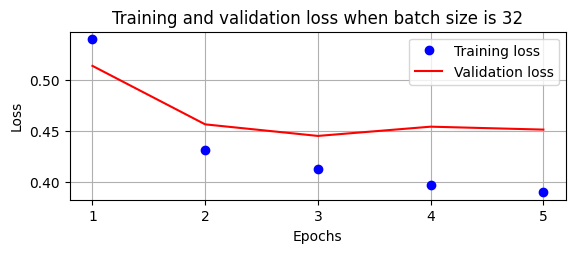

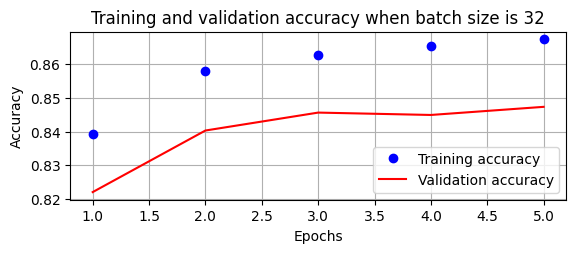

In [2]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

### 2. Batch size of 10000

In [3]:
# 1. Download and import the training images and targets
from torchvision import datasets
import torch


## folder path to download data
data_folder ='Dataset/FMNIST/'

## download FMNIST
fmnist = datasets.FashionMNIST(root=data_folder, download=True,train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

# 2. In a similar manner to training images, we must download and import the validation dataset by specifying train = False 
val_fmnist =datasets.FashionMNIST(data_folder,download=True,train=False)

val_images = val_fmnist.data
val_targets = val_fmnist.targets

# 3. Import the relevant packages and define device
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 4. Define the dataset class (FashionMNIST), the functions that will be used totrain on a batch of data (train_batch), calculate the accuracy (accuracy),and then define the model architecture, the loss function, and the optimizer(get_model).
class FMNISTDataset(Dataset):
    def __init__(self, x,y):
        self.x = (x.float()/255).view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y = self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)
    
## Define the model
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    optimizer = Adam(model.parameters(),lr=1e-2)
    loss_fn = nn.CrossEntropyLoss()
    return model,loss_fn,optimizer
## Define the functions for training and validating a batch of data
def train_batch(x, y, model ,opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()


# 5. Define a function that will get data; that is, get_data. This function will return the training data with a batch size of 32 and the validation dataset with a batch size that's the length of the validation data
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=10000, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

# 6. Define a function that calculates the loss of the validation data; thati s, val_loss.
@torch.inference_mode()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


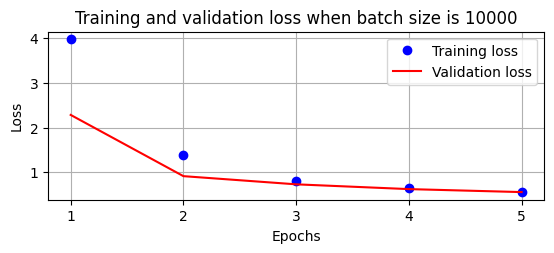

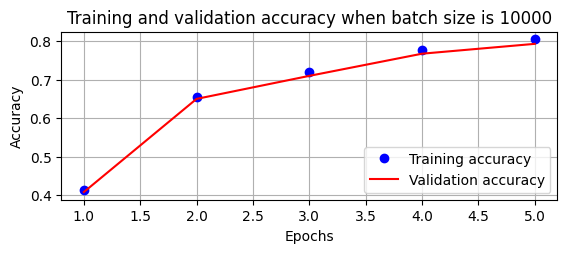

In [5]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 10000')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy when batch size is 10000')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

    Here, we can see that the accuracy and loss values did not reach the same levels as that of the previous scenario, where the batch size was 32, because the time weights are updated fewer times when the batch size is 32 (1875). In the scenario where the batch size is 10,000, there were six weight updates per epoch since there were 10,000 data points per batch, which means that the total training data size was 60,000.

**Note**: Having a lower batch size generally helps in achieving optimal accuracy when you have a small number of epochs, but it should not be so low that training time is impacted. 

---

# Understanding the impact of varying the loss optimizer

#### In this section, we will do the following:
1. Modify the optimizer so that it becomes a Stochastic Gradient Descent (SGD) optimizer

2. Revert to a batch size of 32 while fetching data in the DataLoader

3. Increase the number of epochs to 10 (so that we can compare the performance of SGD and Adam over a longer number of epochs)

### SGD optimizer

In [1]:
# 1. Download and import the training images and targets
from torchvision import datasets
import torch


## folder path to download data
data_folder ='Dataset/FMNIST/'

## download FMNIST
fmnist = datasets.FashionMNIST(root=data_folder, download=True,train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

# 2. In a similar manner to training images, we must download and import the validation dataset by specifying train = False 
val_fmnist =datasets.FashionMNIST(data_folder,download=True,train=False)

val_images = val_fmnist.data
val_targets = val_fmnist.targets

# 3. Import the relevant packages and define device
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 4. Define the dataset class (FashionMNIST), the functions that will be used totrain on a batch of data (train_batch), calculate the accuracy (accuracy),and then define the model architecture, the loss function, and the optimizer(get_model).
class FMNISTDataset(Dataset):
    def __init__(self, x,y):
        self.x = (x.float()/255).view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y = self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)
    
## Define the model
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    optimizer = SGD(model.parameters(),lr=1e-2)
    loss_fn = nn.CrossEntropyLoss()
    return model,loss_fn,optimizer
## Define the functions for training and validating a batch of data
def train_batch(x, y, model ,opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()


# 5. Define a function that will get data; that is, get_data. This function will return the training data with a batch size of 32 and the validation dataset with a batch size that's the length of the validation data
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

# 6. Define a function that calculates the loss of the validation data; thati s, val_loss.
@torch.inference_mode()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9


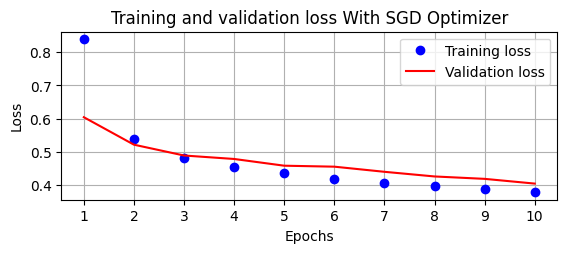

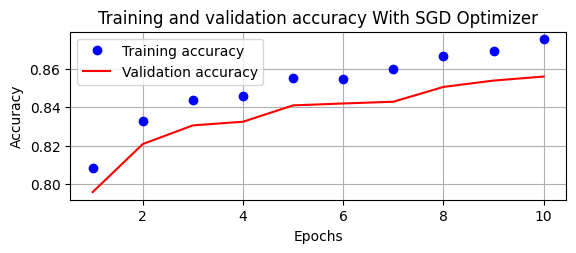

In [3]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(10)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss With SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy With SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

### Adam optimizer

In [4]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9


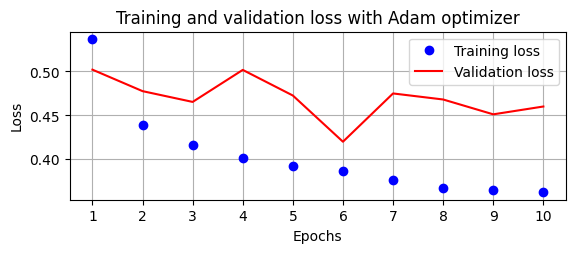

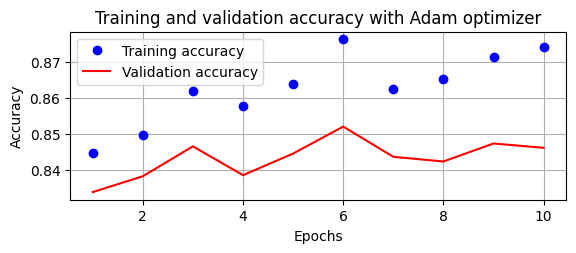

In [5]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(10)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

As you can see, when we used the Adam optimizer, the accuracy was still very close to 85%. However, note that so far, the learning rate has been 0.01.

    Certain optimizers achieve optimal accuracy faster compared to others. Adam generally achieves optimal accuracy faster. Some ofthe other prominent optimizers that are available include Adagrad, Adadelta, AdamW, LBFGS, and RMSprop.

---

# Understanding the impact of varying the learning rate